## 1. Filter notebooks in Kaggle containing errors in their outputs

In [1]:
import util

# 2312, 2311

path = 'C:/Users/yirwa29/Downloads/Dataset-Nb/nbdata_k_2310'
path_des = 'C:/Users/yirwa29/Downloads/Dataset-Nb/nbdata_k_error/2310'
path_des2 = 'C:/Users/yirwa29/Downloads/Dataset-Nb/nbdata_k_valueerror/2310'

path = 'C:/Users/yirwa29/Downloads/Dataset-Nb/nbdata_k_error/2310'

df_err = util.filter_notebooks_with_errors(path, path_des = path_des, path_des2 = path_des2, is_resave = False)

# save the errors
# path_err = 'C:/Users/yirwa29/Downloads/Dataset-Nb/nbdata_k_error/nberror_k.csv'
# new file
# df_err.to_csv(path_err, index=False, encoding='utf-8')
# expand existing file
# df_err.to_csv(path_err, mode='a', index=False, header=False, encoding='utf-8')


Started filtering:

Total number of notebooks containing error: 400
Total number of notebooks that cannot be decoded: 0


In [49]:
# read in all errors from the file
import pandas as pd

path_err = 'C:/Users/yirwa29/Downloads/Dataset-Nb/nbdata_k_error/nberror_k.csv'
df_err = pd.read_csv(path_err, encoding='utf-8')

In [54]:
df_err["fname"].nunique()

1127

In [56]:
df_err.count()

fname        1775
ename        1774
evalue       1466
traceback    1775
dtype: int64

<Axes: xlabel='ename'>

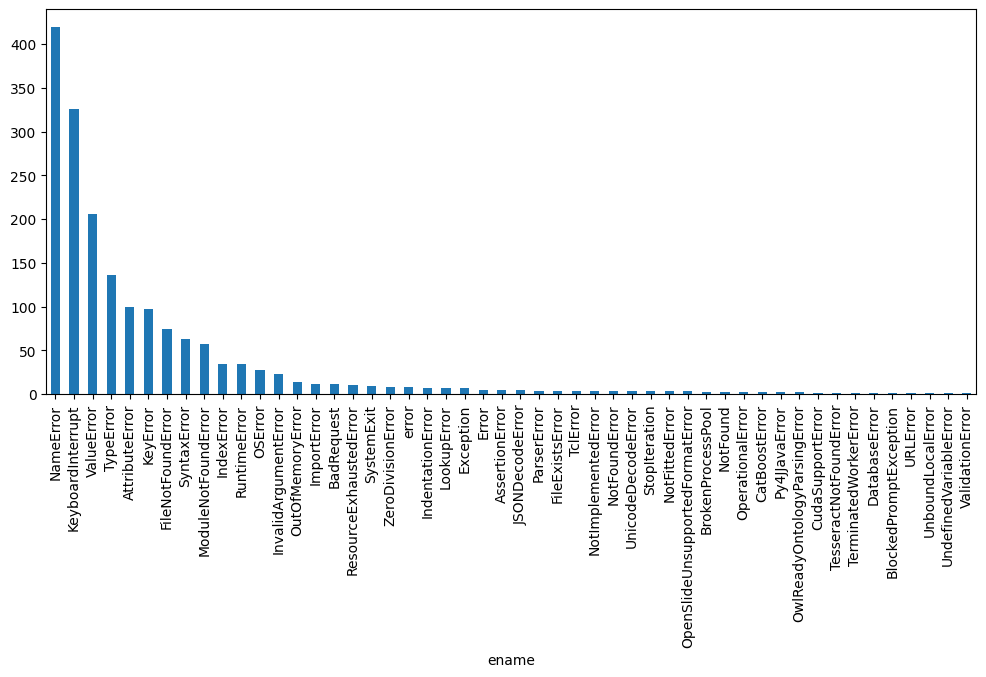

In [59]:
df_err["ename"].groupby([df_err["ename"]]).count().sort_values(ascending=0)[:50].plot(kind="bar", figsize=(12,5))

## 2. Filter notebooks in Github containing errors in their outputs

Parquet all (0-312): 

    Total number of notebooks containing error: 112430
    Total number of notebooks that cannot be decoded: 10602
    
    Total number of errors: 184961
    Total number of unique errors: 1675

Parquet 0-99: 

    Total number of notebooks containing error: 36119
    Total number of notebooks that cannot be decoded: 3392
    
    Total number of errors: 60623
    Total number of unique errors: 861

Parquet 100-199:

    Total number of notebooks containing error: 35848
    Total number of notebooks that cannot be decoded: 3376
    
    Total number of errors: 58013
    Total number of unique errors: 876

Parquet 200-311:

    Total number of notebooks containing error: 40463
    Total number of notebooks that cannot be decoded: 3834
    
    Total number of errors: 66325
    Total number of unique errors: 914


In [10]:
# import time
# print(time.strftime("%H:%M:%S", time.localtime()))
# time.sleep(4000)
# print(time.strftime("%H:%M:%S", time.localtime()))

# nbdata_g

path = 'C:/Users/yirwa29/Downloads/Dataset-Nb/nbdata_g/nbfiles'

path_des = 'C:/Users/yirwa29/Downloads/Dataset-Nb/nbdata_g_error'
path_des2 = 'C:/Users/yirwa29/Downloads/Dataset-Nb/nbdata_g_valueerror'

# path = 'C:/Users/yirwa29/Downloads/Dataset-Nb/nbdata_g_error'

df2_err = util.filter_notebooks_with_errors(path, path_des = path_des, path_des2 = path_des2, is_resave = False)

# save the errors
path2_err = 'C:/Users/yirwa29/Downloads/Dataset-Nb/nberror_g.csv'
# new file
df2_err.to_csv(path2_err, index=False, encoding='utf-8')
# expand existing file
#df2_err.to_csv(path2_err, mode='a', index=False, header=False, encoding='utf-8')

16:48:08
17:54:48

Started filtering:

Total number of notebooks containing error: 35848
Total number of notebooks that cannot be decoded: 3376


In [15]:
import pandas as pd

path2_err1 = 'C:/Users/yirwa29/Downloads/Dataset-Nb/nberror_g_0-99.csv'
path2_err2 = 'C:/Users/yirwa29/Downloads/Dataset-Nb/nberror_g_100-199.csv'
path2_err3 = 'C:/Users/yirwa29/Downloads/Dataset-Nb/nberror_g_200-312.csv'
df2_err1 = pd.read_csv(path2_err1, encoding='utf-8')
df2_err2 = pd.read_csv(path2_err2, encoding='utf-8')
df2_err3 = pd.read_csv(path2_err3, encoding='utf-8')
df2_err = pd.concat([df2_err1, df2_err2, df2_err3], axis=0)
df2_err.to_csv('C:/Users/yirwa29/Downloads/Dataset-Nb/nberror_g_all.csv', index=False, encoding='utf-8')

In [36]:
# read in all errors from the file
import pandas as pd

df2_err = pd.read_csv('C:/Users/yirwa29/Downloads/Dataset-Nb/nberror_g_all.csv', encoding='utf-8')

In [43]:
df2_err.head()

,fname,ename,evalue,traceback
0,00000-101-cookie-clicker-v2-checkpoint.ipynb,KeyboardInterrupt,NaN,['\x1b[0;31m----------------------------------...
1,00000-1012-demand-forecasting-data-prep-from-s...,OperationalError,"FATAL: no pg_hba.conf entry for host ""75.166....",['\x1b[0;31m----------------------------------...
2,00000-1017-heatmapseq2seq.ipynb,ValueError,"x and y must have same first dimension, but ha...",['\x1b[0;31m----------------------------------...
3,00000-1023-crawler-20190515-20190516.ipynb,ConnectionError,HTTPSConnectionPool(host='www.backpackers.com....,['\x1b[1;31m----------------------------------...
4,00000-1033-peer-solution-predicting-survival-t...,URLError,<urlopen error [Errno 11001] getaddrinfo failed>,['\x1b[1;31m----------------------------------...


In [38]:
df2_err.count()

fname        184961
ename        183760
evalue       165440
traceback    184961
dtype: int64

In [39]:
df2_err["fname"].nunique()

112430

<Axes: xlabel='ename'>

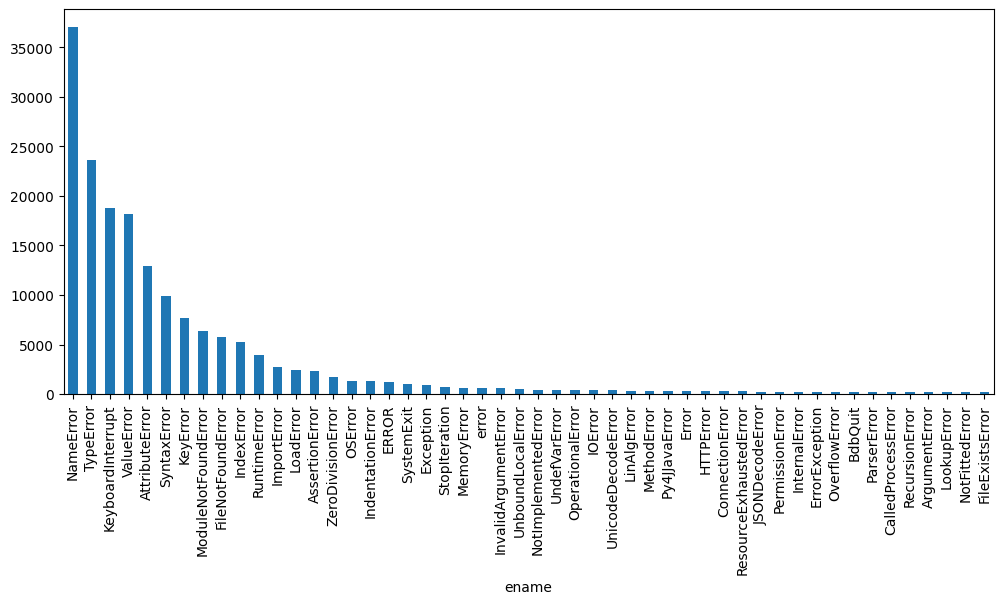

In [41]:
df2_err["ename"].groupby([df2_err["ename"]]).count().sort_values(ascending=0)[:50].plot(kind="bar", figsize=(12,5))

## [deprecated] Get commit urls from the table obtained in bigquery public dataset

But the public dataset hasn't been updated for over a year

### Get urls for the commits

In [ ]:
# This is via gh API call, it turns out no need to do this

import pandas as pd
import re
import json
import numpy as np
import time

def escape_ansi(line, max_retries: int = 10,):
    ansi_escape = re.compile(r'(?:\x1B[@-_]|[\x80-\x9F])[0-?]*[ -/]*[@-~]')
    res = ansi_escape.sub('', line)
    num_retries = 0
    if res==res:
        while True:
            try:
                jsonobj = json.loads(res)
                if len(jsonobj)>0:
                    return jsonobj[0]['url']
                else:
                    print("error: decoding url", jsonobj)
                    return None
            # Retry on specific errors
            except ValueError:  # includes simplejson.decoder.JSONDecodeError
                print('Decoding JSON has failed due to: ', res, 'Retrying')
                num_retries += 1
                if num_retries > max_retries:
                    print(f"Maximum number of retries ({max_retries}) exceeded.")
                    return None
                delay = 60
                # Sleep for the delay
                time.sleep(delay)
    else:
        print("error: did not get any url from GitHub API")
        return None
    
def request_commits_with_sha(data_commits_sample):
    urls = []
    for commit in data_commits_sample:
        if commit!=commit:
            print('none sha ---- skip', commit)
            continue
        s="gh search commits --hash={0} --json url".format(commit)
        o = !$s
        url = escape_ansi(o.nlstr)
        if url:
            urls.append(url)
        else: 
            print('none url retrived ---- skip', commit)
    return urls

In [ ]:
# commits data from bigquery
data = pd.read_csv('C:/Users/yirwa29/Downloads/jupyter_nbs_saml/target_nbs/notebook_commits.csv')
data_commits = np.unique(data['commit'])
print('total amount of unique commits:', len(data_commits))

In [64]:
# This is via put strings together, it is simple and correct, we use this

def get_commit_url(commit_id, repo_name):
    return "https://github.com/{0}/commit/{1}".format(repo_name, commit_id)

def get_all_urls():
    urls = []
    for index, row in data.iterrows():
        url = get_commit_url(row['commit'], row['name'])
        urls.append(url)
    return urls

urls = get_all_urls()

# save all the commit urls to the csv file
import pandas as pd
data['url'] = urls
data.to_csv('C:/Users/yirwa29/Downloads/jupyter_nbs_saml/target_nbs/notebook_commits_url.csv', index=False)

In [67]:
# URL Wrapper for printing clickable urls

from dataclasses import dataclass

@dataclass(frozen=True)
class Url:
    """Wrapper around a URL string to provide nice display in IPython environments."""

    __url: str

    def _repr_html_(self):
        """HTML link to this URL."""
        return f'<a href="{self.__url}">{self.__url}</a>'

    def __str__(self):
        """Return the underlying string."""
        return self.__url

In [75]:
data = pd.read_csv('C:/Users/yirwa29/Downloads/jupyter_nbs_saml/target_nbs/notebook_commits_url.csv')
data_commiturls = np.unique(data['url'])
print('total amount of commits:', len(data_commiturls))

sample_size = 100
data_commiturls_sample = np.random.choice(data_commiturls, sample_size, replace=False)

data_checked = pd.read_csv('C:/Users/yirwa29/Downloads/jupyter_nbs_saml/target_nbs/checked.csv')
urls_checked = np.unique(data_checked['url'])
print('total amount of checked commits:', len(urls_checked))

data_commiturls_sample = np.setdiff1d(data_commiturls_sample, urls_checked)
print('total amount of sampled commits:', len(data_commiturls_sample))

total amount of commits: 3448
total amount of checked commits: 30
total amount of sampled commits: 99


In [76]:
for i in data_commiturls_sample:
    print(Url(i))

https://github.com/GoogleCloudPlatform/asl-ml-immersion/commit/8ce0706cc0321b4f9b3a3fdd8bde142e13607eb9
https://github.com/GoogleCloudPlatform/dataproc-templates/commit/606a3729332d1ef5fcfa94e9962efdf7cb28bc2b
https://github.com/GoogleCloudPlatform/dataproc-templates/commit/a9e4ae1859708e045af13d4b84d35f128b2f4907
https://github.com/GoogleCloudPlatform/vertex-ai-samples/commit/095b0bd6282d7817d5677c06f4d3c1fb2504f9d8
https://github.com/GoogleCloudPlatform/vertex-ai-samples/commit/0d346b136e7d4cc6ee43a8528bf78a3ca5380c8d
https://github.com/GoogleCloudPlatform/vertex-ai-samples/commit/0e811868d3d982bd88375f3f8c8b4c5f234a6aee
https://github.com/GoogleCloudPlatform/vertex-ai-samples/commit/168c5c2f1561f40ca604029c3e34291ca21589cf
https://github.com/GoogleCloudPlatform/vertex-ai-samples/commit/2c9c8db15c60b5c12abbb39e1fdf5e6fa9691e8c
https://github.com/GoogleCloudPlatform/vertex-ai-samples/commit/351fc3e4d3a1a61a3f24c92a2e3f07e27b690fb7
https://github.com/GoogleCloudPlatform/vertex-ai-sampl

Found coding errors:

- shape error and still not fixed: [OpenMined/PySyft](https://github.com/OpenMined/PySyft/commit/f18baa0e519f12ac009579a4dc6d64b074eb6ffc)
- maybe a fixed error: [google/learned_optimization](https://github.com/google/learned_optimization/commit/47c990af061cab47f8d6fbd871f6d5d43827cdcd)

In [58]:
# save the checked ones

checked_dicts = []
# for i in range(30):
#     d = {'commit':data_commits_sample[i], 'url':urls[i]}
#     checked_dicts.append(d)

import csv 
field_names = ['commit', 'url'] 
with open('C:/Users/yirwa29/Downloads/jupyter_nbs_saml/target_nbs/checked.csv', 'a') as csvfile: 
    writer = csv.DictWriter(csvfile, fieldnames = field_names) 
    for x in checked_dicts:
        writer.writerow(x)